<a href="https://colab.research.google.com/github/Avinash9908/Hospitality-Analysis/blob/main/AirBnb_Listings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
listings = pd.read_csv("Listings.csv",encoding="ISO-8859-1",low_memory = False)

In [ ]:
listings.head()


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919.0,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771.0,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768.0,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311.0,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558.0,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   9582 non-null   int64  
 1   name                         9551 non-null   object 
 2   host_id                      9581 non-null   float64
 3   host_since                   9581 non-null   object 
 4   host_location                9581 non-null   object 
 5   host_response_time           0 non-null      float64
 6   host_response_rate           0 non-null      float64
 7   host_acceptance_rate         340 non-null    float64
 8   host_is_superhost            9581 non-null   object 
 9   host_total_listings_count    9581 non-null   float64
 10  host_has_profile_pic         9581 non-null   object 
 11  host_identity_verified       9581 non-null   object 
 12  neighbourhood                9581 non-null   object 
 13  district          

In [ ]:
listings["host_since"] = pd.to_datetime(listings["host_since"])
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   9582 non-null   int64         
 1   name                         9551 non-null   object        
 2   host_id                      9581 non-null   float64       
 3   host_since                   9581 non-null   datetime64[ns]
 4   host_location                9581 non-null   object        
 5   host_response_time           0 non-null      float64       
 6   host_response_rate           0 non-null      float64       
 7   host_acceptance_rate         340 non-null    float64       
 8   host_is_superhost            9581 non-null   object        
 9   host_total_listings_count    9581 non-null   float64       
 10  host_has_profile_pic         9581 non-null   object        
 11  host_identity_verified       9581 non-null 

In [ ]:
paris_listings = listings.query("city == 'Paris'").loc[:,["host_since","neighbourhood","city","accommodates","price"]]
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9553 entries, 0 to 9580
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     9553 non-null   datetime64[ns]
 1   neighbourhood  9553 non-null   object        
 2   city           9553 non-null   object        
 3   accommodates   9553 non-null   float64       
 4   price          9553 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 447.8+ KB


In [ ]:
paris_listings.describe()

,host_since,accommodates,price
count,9553,9553.000000,9553.000000
mean,2015-02-26 07:44:25.424474368,3.036428,92.192714
min,2009-10-28 00:00:00,1.000000,8.000000
25%,2014-02-04 00:00:00,2.000000,59.000000
50%,2015-02-13 00:00:00,2.000000,78.000000
75%,2016-01-10 00:00:00,4.000000,100.000000
max,2020-09-28 00:00:00,14.000000,6742.000000
std,NaN,1.296066,94.131387


In [ ]:
paris_listings_neighbourhood =  paris_listings.groupby("neighbourhood").agg({"price" : "mean"}).sort_values("price")
paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,72.206745
Buttes-Chaumont,73.062016
Popincourt,80.429760
Reuilly,80.571429
Observatoire,84.862805


In [19]:
paris_listings_accommodates =  (paris_listings
                                .query("neighbourhood == 'Elysee'")
                                .groupby("accommodates")
                                .agg({"price" : "mean"})
                                .sort_values("price")
                                )
paris_listings_accommodates.head()

,price
accommodates,
1.0,64.000000
2.0,96.950820
3.0,113.615385
4.0,135.625000
5.0,213.500000


In [24]:
paris_listings_overtime = (
    paris_listings
    .set_index("host_since")
    .resample("YE")
    .agg({"neighbourhood" : "count","price" : "mean"})
)

In [25]:
paris_listings_overtime.head()

,neighbourhood,price
host_since,,
2009-12-31,2,93.000000
2010-12-31,15,108.866667
2011-12-31,157,97.114650
2012-12-31,626,90.976038
2013-12-31,1454,92.433287


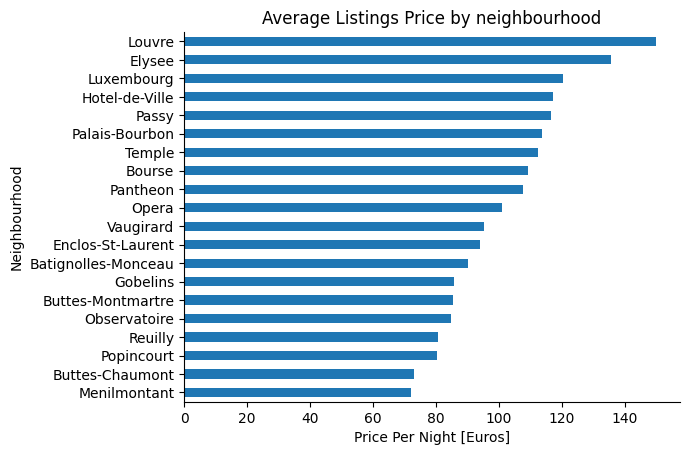

In [33]:
 import seaborn as sns
(paris_listings_neighbourhood
 .plot
 .barh(
     title="Average Listings Price by neighbourhood",
     xlabel="Price Per Night [Euros]",
     ylabel="Neighbourhood",
     legend=None
 ))
sns.despine()

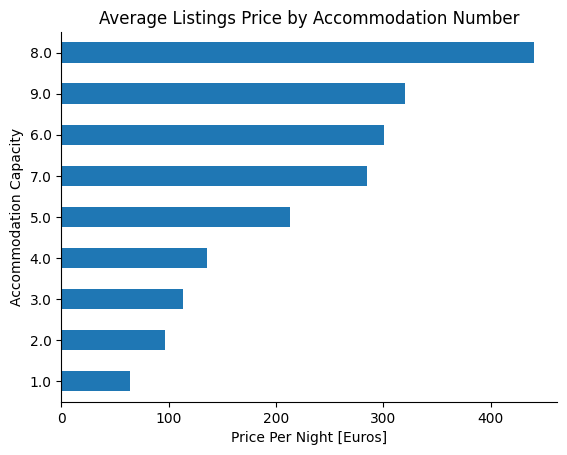

In [34]:
 import seaborn as sns
(paris_listings_accommodates
 .plot
 .barh(
     title="Average Listings Price by Accommodation Number",
     xlabel="Price Per Night [Euros]",
     ylabel="Accommodation Capacity",
     legend=None
 ))
sns.despine()

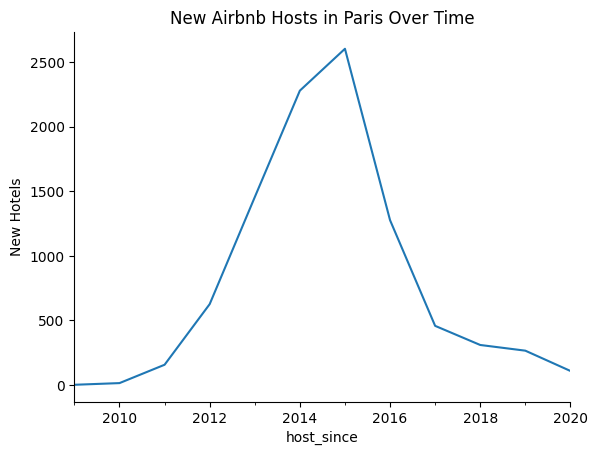

In [36]:
paris_listings_overtime["neighbourhood"].plot(
    ylabel="New Hotels",
    title="New Airbnb Hosts in Paris Over Time"
)
sns.despine()

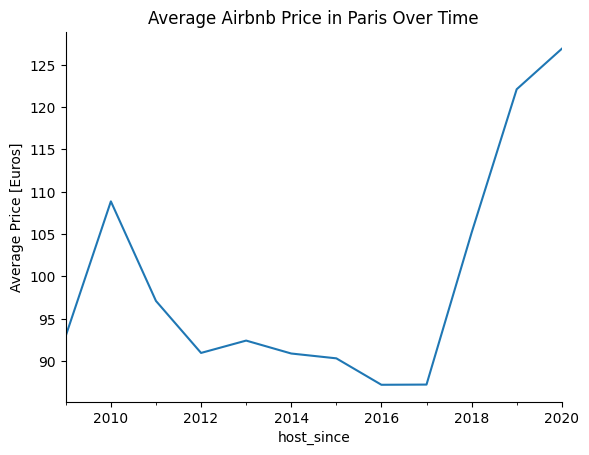

In [37]:
paris_listings_overtime["price"].plot(
    ylabel="Average Price [Euros]",
    title="Average Airbnb Price in Paris Over Time"
)
sns.despine()


Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts,Higher Prices')

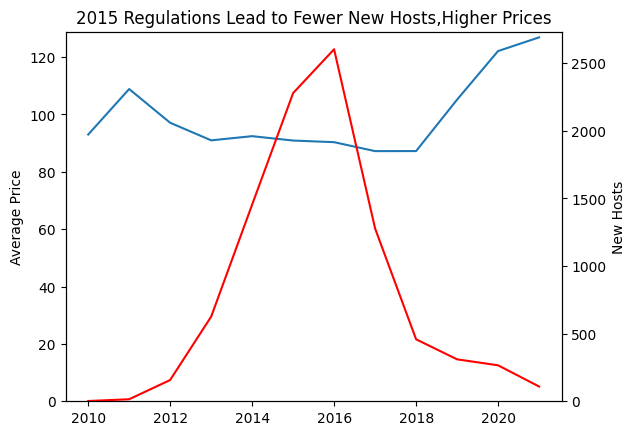

In [47]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(
    paris_listings_overtime.index,
    paris_listings_overtime["price"],
    label="Average Price"
)
ax.set_ylim(0)
ax.set_ylabel("Average Price")
ax2 = ax.twinx()
ax2.plot(
    paris_listings_overtime.index,
    paris_listings_overtime["neighbourhood"],
    label="New Hosts",
    c="Red"

)
ax2.set_ylabel("New Hosts")
ax2.set_ylim(0)
ax.set_title("2015 Regulations Lead to Fewer New Hosts,Higher Prices")